In [1]:
import sys

assert sys.version_info >= (3, 7)

In [2]:
from packaging import version
import sklearn

assert version.parse(sklearn.__version__) >= version.parse("1.0.1")

In [3]:
from pathlib import Path
import pandas as pd

student = pd.read_csv("./datasets/student_sleep_patterns.csv")


In [4]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [5]:
IMAGES_PATH = Path() / "images"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [6]:
print(student)

     Student_ID  Age  Gender University_Year  Sleep_Duration  Study_Hours  \
0             1   24   Other        2nd Year             7.7          7.9   
1             2   21    Male        1st Year             6.3          6.0   
2             3   22    Male        4th Year             5.1          6.7   
3             4   24   Other        4th Year             6.3          8.6   
4             5   20    Male        4th Year             4.7          2.7   
..          ...  ...     ...             ...             ...          ...   
495         496   24    Male        2nd Year             5.1          9.3   
496         497   20    Male        2nd Year             8.9          7.7   
497         498   21    Male        3rd Year             5.7          6.4   
498         499   18  Female        2nd Year             4.9          0.5   
499         500   21    Male        3rd Year             7.9         11.6   

     Screen_Time  Caffeine_Intake  Physical_Activity  Sleep_Quality  \
0   

In [7]:
student.head()

,Student_ID,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,1,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,2,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,3,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,4,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,5,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [8]:
student.drop(columns=['Student_ID'],inplace=True)

In [9]:
student.head()

,Age,Gender,University_Year,Sleep_Duration,Study_Hours,Screen_Time,Caffeine_Intake,Physical_Activity,Sleep_Quality,Weekday_Sleep_Start,Weekend_Sleep_Start,Weekday_Sleep_End,Weekend_Sleep_End
0,24,Other,2nd Year,7.7,7.9,3.4,2,37,10,14.16,4.05,7.41,7.06
1,21,Male,1st Year,6.3,6.0,1.9,5,74,2,8.73,7.10,8.21,10.21
2,22,Male,4th Year,5.1,6.7,3.9,5,53,5,20.00,20.47,6.88,10.92
3,24,Other,4th Year,6.3,8.6,2.8,4,55,9,19.82,4.08,6.69,9.42
4,20,Male,4th Year,4.7,2.7,2.7,0,85,3,20.98,6.12,8.98,9.01


In [10]:
student.dtypes

Age                      int64
Gender                  object
University_Year         object
Sleep_Duration         float64
Study_Hours            float64
Screen_Time            float64
Caffeine_Intake          int64
Physical_Activity        int64
Sleep_Quality            int64
Weekday_Sleep_Start    float64
Weekend_Sleep_Start    float64
Weekday_Sleep_End      float64
Weekend_Sleep_End      float64
dtype: object

In [11]:
student.isnull().sum()

Age                    0
Gender                 0
University_Year        0
Sleep_Duration         0
Study_Hours            0
Screen_Time            0
Caffeine_Intake        0
Physical_Activity      0
Sleep_Quality          0
Weekday_Sleep_Start    0
Weekend_Sleep_Start    0
Weekday_Sleep_End      0
Weekend_Sleep_End      0
dtype: int64

In [12]:
import matplotlib.pyplot as plt
import seaborn as sns

<Axes: xlabel='Age', ylabel='Sleep_Quality'>

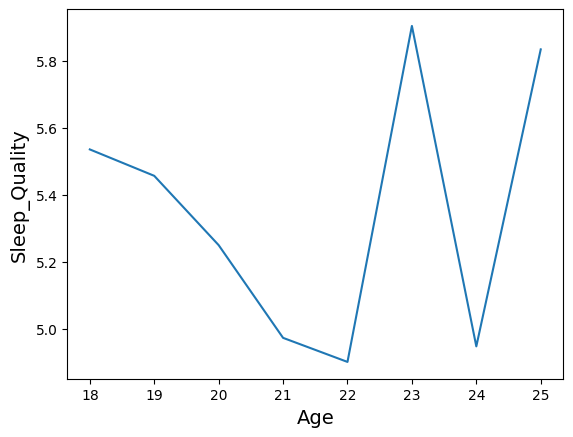

In [13]:
student_age =student.groupby("Age").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Age',y='Sleep_Quality',data=student_age)

<Axes: xlabel='Gender', ylabel='Sleep_Quality'>

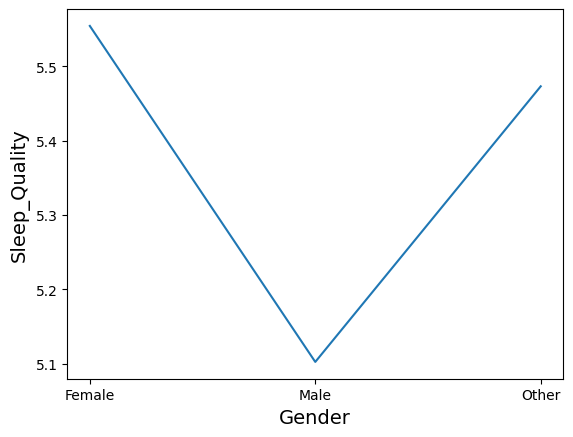

In [14]:
student_gender =student.groupby("Gender").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Gender',y='Sleep_Quality',data=student_gender)

<Axes: xlabel='University_Year', ylabel='Sleep_Quality'>

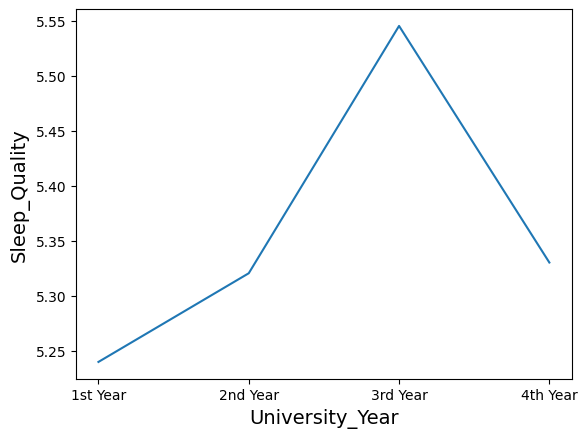

In [15]:
student_University_Year =student.groupby("University_Year").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='University_Year',y='Sleep_Quality',data=student_University_Year)

<Axes: xlabel='Study_Hours', ylabel='Sleep_Quality'>

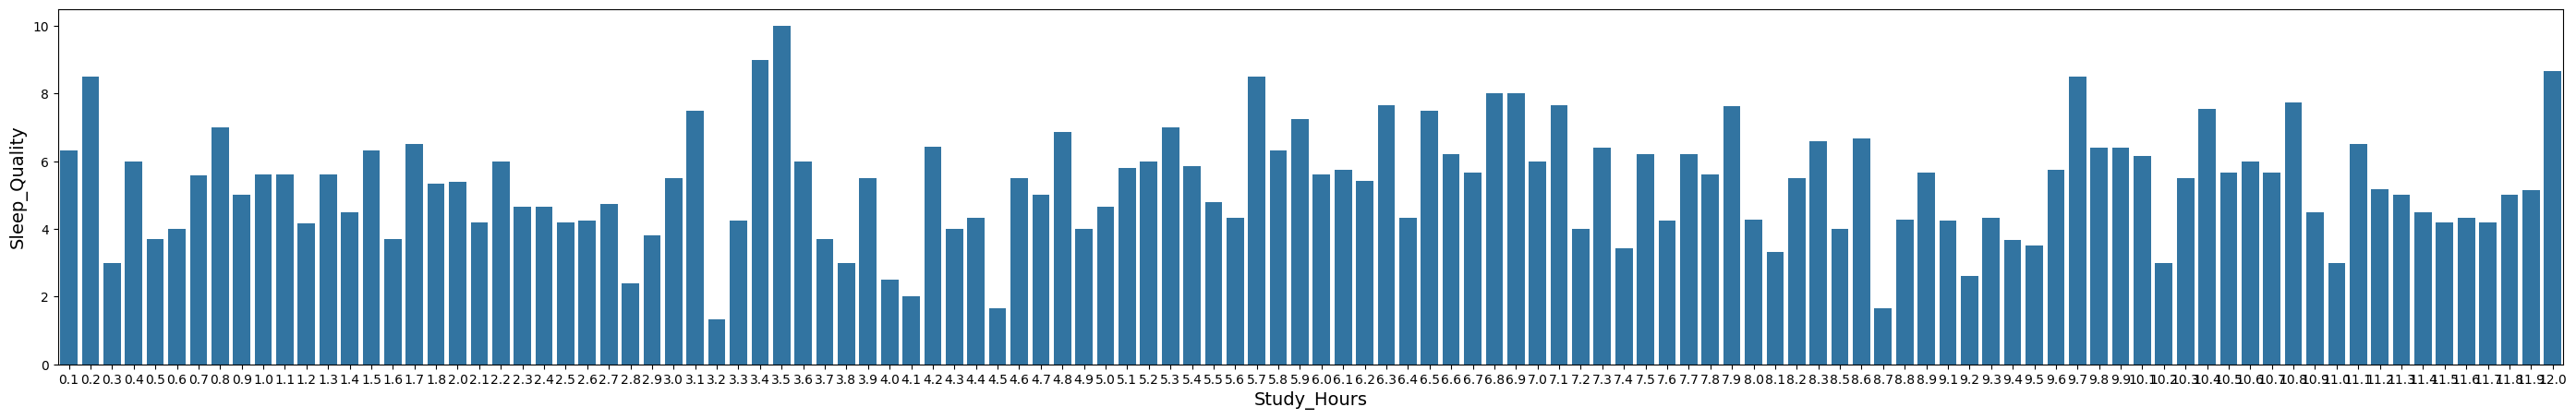

In [16]:
student_Study_Hours =student.groupby("Study_Hours").agg({"Sleep_Quality":"mean"}).reset_index()
plt.figure(figsize=(35,5))
sns.barplot(x='Study_Hours',y='Sleep_Quality',data=student_Study_Hours)

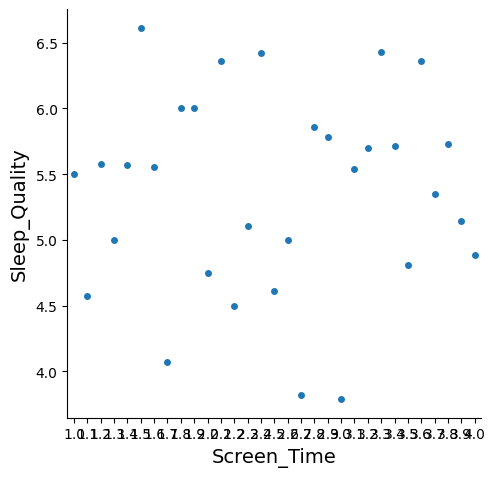

In [17]:
student_Screen_Time =student.groupby("Screen_Time").agg({"Sleep_Quality":"mean"}).reset_index()
sns.catplot(x='Screen_Time',y='Sleep_Quality',data=student_Screen_Time)

<Axes: xlabel='Caffeine_Intake', ylabel='Sleep_Quality'>

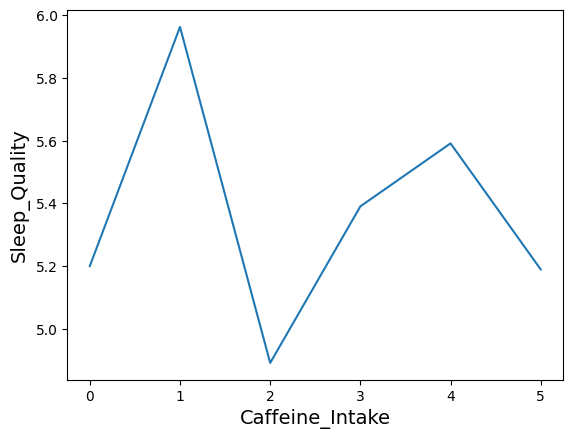

In [18]:
student_Caffeine_Intake =student.groupby("Caffeine_Intake").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Caffeine_Intake',y='Sleep_Quality',data=student_Caffeine_Intake)

<Axes: xlabel='Physical_Activity', ylabel='Sleep_Quality'>

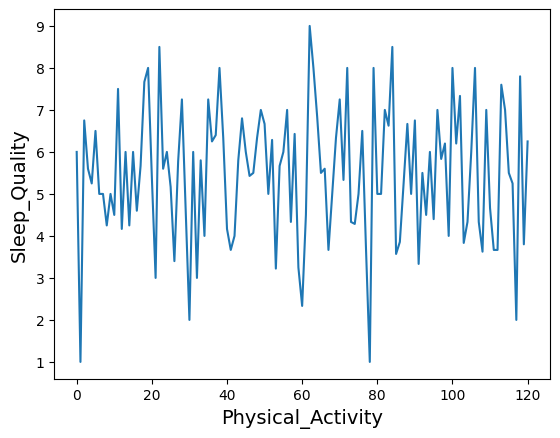

In [19]:
student_Physical_Activity =student.groupby("Physical_Activity").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Physical_Activity',y='Sleep_Quality',data=student_Physical_Activity)

<Axes: xlabel='Sleep_Duration', ylabel='Sleep_Quality'>

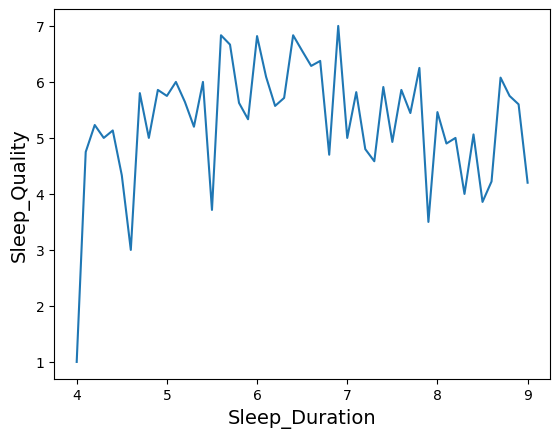

In [20]:
student_Sleep_Duration =student.groupby("Sleep_Duration").agg({"Sleep_Quality":"mean"}).reset_index()
sns.lineplot(x='Sleep_Duration',y='Sleep_Quality',data=student_Sleep_Duration)

<Axes: xlabel='Caffeine_Intake', ylabel='Study_Hours'>

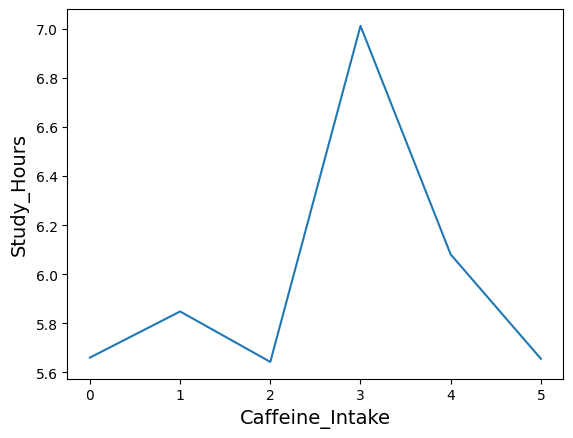

In [21]:
student_Caffeine_Intake_1 =student.groupby("Caffeine_Intake").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Caffeine_Intake',y='Study_Hours',data=student_Caffeine_Intake_1)

<Axes: xlabel='Age', ylabel='Study_Hours'>

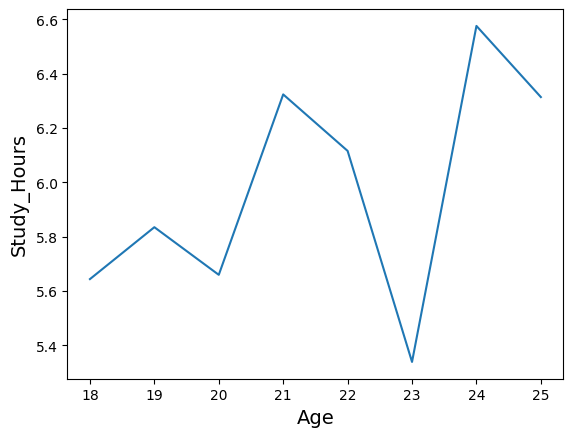

In [22]:
student_Age_1 =student.groupby("Age").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Age',y='Study_Hours',data=student_Age_1)

<Axes: xlabel='Gender', ylabel='Study_Hours'>

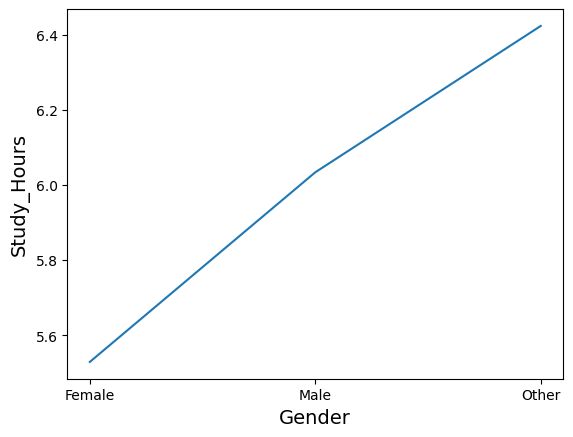

In [23]:
student_Gender_1 =student.groupby("Gender").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Gender',y='Study_Hours',data=student_Gender_1)

<Axes: xlabel='University_Year', ylabel='Study_Hours'>

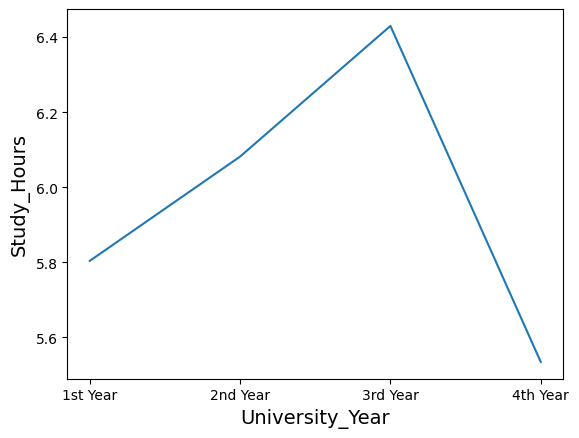

In [24]:
student_University_Year_1 =student.groupby("University_Year").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='University_Year',y='Study_Hours',data=student_University_Year_1)

<Axes: xlabel='Sleep_Quality', ylabel='Study_Hours'>

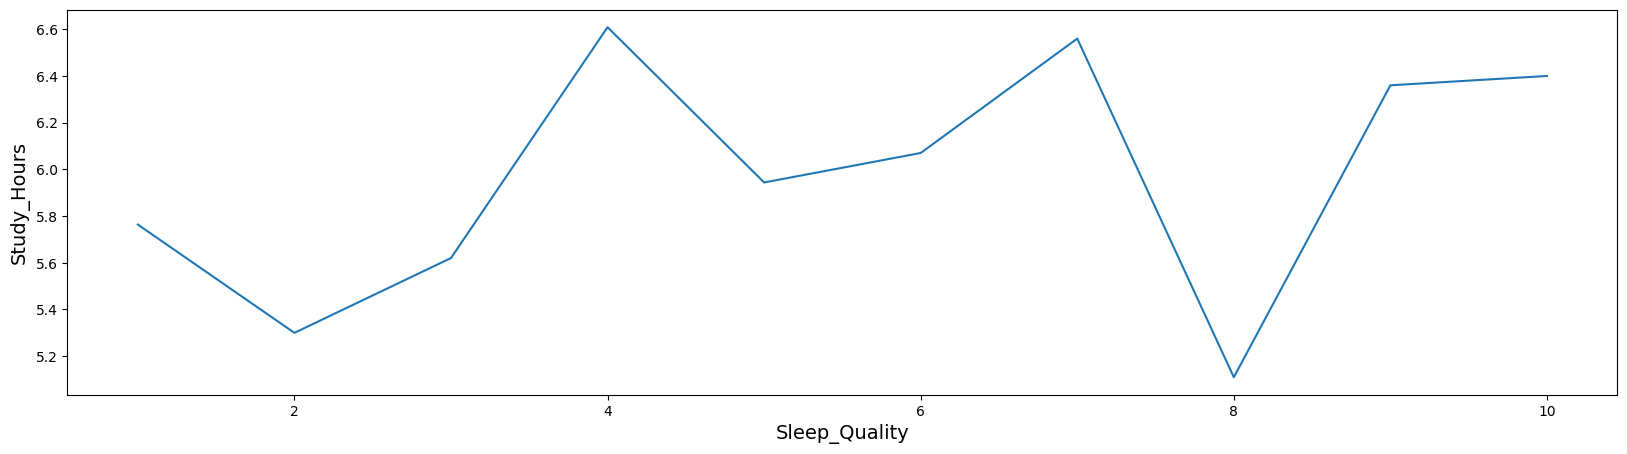

In [25]:
student_Sleep_Quality_1 =student.groupby("Sleep_Quality").agg({"Study_Hours":"mean"}).reset_index()
plt.figure(figsize=(20,5))
sns.lineplot(x='Sleep_Quality',y='Study_Hours',data=student_Sleep_Quality_1)

<Axes: xlabel='Screen_Time', ylabel='Study_Hours'>

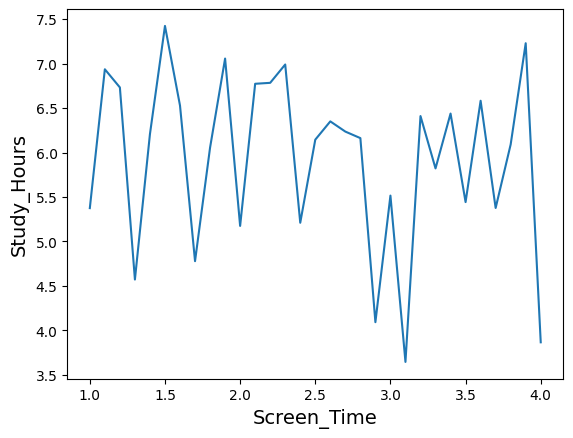

In [26]:
student_Screen_Time_1 =student.groupby("Screen_Time").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Screen_Time',y='Study_Hours',data=student_Screen_Time_1)

<Axes: xlabel='Physical_Activity', ylabel='Study_Hours'>

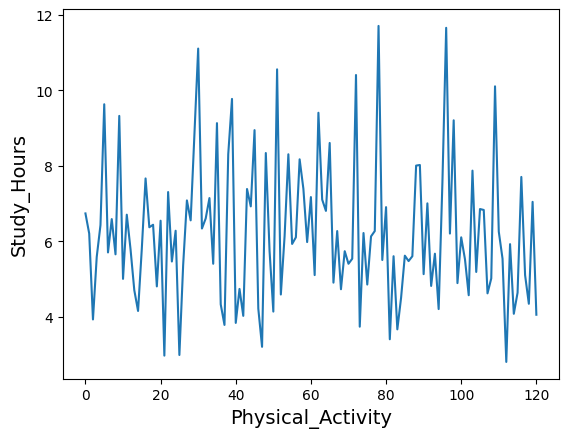

In [27]:

student_Physical_Activity_1 =student.groupby("Physical_Activity").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Physical_Activity',y='Study_Hours',data=student_Physical_Activity_1)

<Axes: xlabel='Sleep_Duration', ylabel='Study_Hours'>

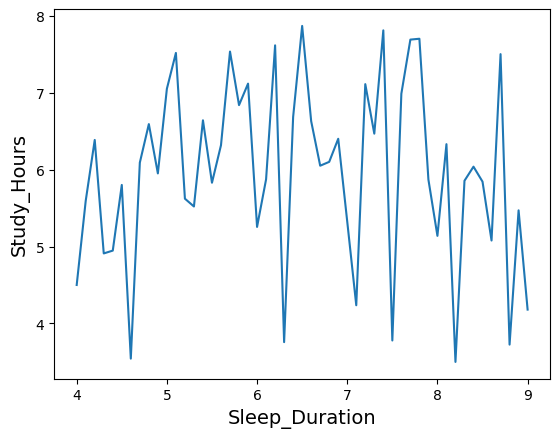

In [28]:

student_Sleep_Duration_1 =student.groupby("Sleep_Duration").agg({"Study_Hours":"mean"}).reset_index()
sns.lineplot(x='Sleep_Duration',y='Study_Hours',data=student_Sleep_Duration_1)

Null 값 없음
이상치 없음
나이 22, 24, 21 순으로 수면의 질이 낮음
남성의 수면의 질이 낮음
1학년의 수면의 질이 낮음, 3학년의 수면의 질이 높음
공부 시간, 활동 시간, 신체 활동과의 수면의 질은 큰 연관성을 찾을 수 없음
카페인 섭취량이 늘었을 때 수면의 질이 떨어지는 경향이 나타남
카페인 섭취량이 늘었을 때 공부 시간은 증가하는 모습을 보임
공부 시간은 활동 시간, 신체 활동, 수면 시간과 유의미한 관계성을 창을 수 없음

<h1> 카페인과 학습량 선형 회귀

In [29]:
student = pd.read_csv("./datasets/student_sleep_patterns.csv")
caffeine_intake = student["Caffeine_Intake"]
study_hours = student["Study_Hours"]

In [ ]:
X_train, y_train = study_hours[:400], caffeine_intake[:400]
X_test, y_test = study_hours[400:], caffeine_intake[400:]

In [31]:
X_train # 학습량

0       7.9
1       6.0
2       6.7
3       8.6
4       2.7
       ... 
395     1.2
396     8.3
397     0.7
398     6.1
399    12.0
Name: Study_Hours, Length: 400, dtype: float64

In [32]:
y_train #카페인 섭취

0      2
1      5
2      5
3      4
4      0
      ..
395    5
396    3
397    4
398    5
399    5
Name: Caffeine_Intake, Length: 400, dtype: int64

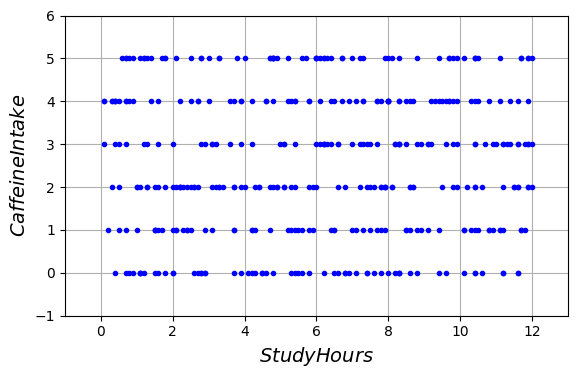

In [ ]:
plt.figure(figsize=(6, 4))
plt.plot(X_train, y_train, "b.")
plt.xlabel("$Study Hours$")
plt.ylabel("$Caffeine Intake$", rotation=90)
plt.axis([-1, 13, -1,6])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [ ]:
# Ground truth(정답값) 설정
import numpy as np

y_pred = np.empty((0, 2))
tolerance = 0.7
k=5/12

for (x, y) in zip(X_train, y_train):
    if abs(y - k * x) <= tolerance:
        y_pred = np.append(y_pred, [[x, y]], axis=0)

In [37]:
y_pred

array([[ 8.6,  4. ],
       [ 2.4,  1. ],
       [ 8.2,  3. ],
       [ 0.4,  0. ],
       [10.4,  4. ],
       [ 8.7,  4. ],
       [ 5.1,  2. ],
       [ 3.3,  2. ],
       [ 1.6,  0. ],
       [11.7,  5. ],
       [10.3,  4. ],
       [10.4,  5. ],
       [ 5.3,  2. ],
       [ 9.3,  4. ],
       [ 1.6,  1. ],
       [ 0.9,  0. ],
       [ 8. ,  4. ],
       [ 7. ,  3. ],
       [ 2.5,  1. ],
       [ 3.2,  2. ],
       [ 6.4,  3. ],
       [ 1.5,  1. ],
       [ 5.4,  2. ],
       [ 6.1,  3. ],
       [ 6.2,  3. ],
       [ 5.9,  2. ],
       [ 8. ,  4. ],
       [ 1.7,  1. ],
       [ 3.7,  1. ],
       [ 8.5,  3. ],
       [ 8.3,  4. ],
       [ 8.2,  3. ],
       [ 8.3,  4. ],
       [ 4.7,  2. ],
       [11.7,  5. ],
       [ 4.9,  2. ],
       [10.5,  5. ],
       [ 4.8,  2. ],
       [ 8. ,  4. ],
       [ 9.6,  4. ],
       [ 9.8,  4. ],
       [ 4.4,  2. ],
       [ 8.3,  3. ],
       [ 7.4,  3. ],
       [10.4,  5. ],
       [ 6.2,  3. ],
       [ 9.2,  4. ],
       [ 2.3,

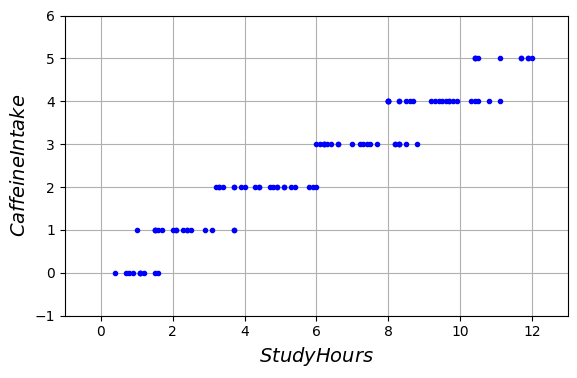

In [38]:
x, y = zip(*y_pred)

plt.figure(figsize=(6, 4))
plt.plot(x, y , "b.")
plt.xlabel("$Study Hours$")
plt.ylabel("$Caffeine Intake$", rotation=90)
plt.axis([-1, 13, -1,6])
plt.grid()
save_fig("generated_data_plot")
plt.show()

In [39]:
from sklearn.preprocessing import add_dummy_feature

X = y_pred[:, 0]  
y = y_pred[:, 1] 

In [40]:
X_b = add_dummy_feature(X.reshape(-1, 1)) 

theta_best = np.linalg.inv(X_b.T @ X_b) @ X_b.T @ y.reshape(-1, 1)

In [41]:
theta_best

array([[-0.00389184],
       [ 0.42666767]])

In [42]:
X_new = np.array([[0], [12]])
X_new_b = add_dummy_feature(X_new)
y_predict = X_new_b @ theta_best
y_predict

array([[-3.89184367e-03],
       [ 5.11612021e+00]])

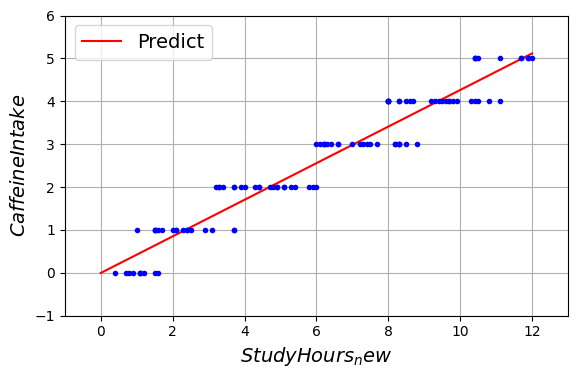

In [43]:
import matplotlib.pyplot as plt

x, y = zip(*y_pred)

plt.figure(figsize=(6, 4))
plt.plot(X_new, y_predict, 'r-', label="Predict")
plt.plot(x, y , "b.")

# 추가 코드 - 그림 4-2를 꾸미고 저장합니다.
plt.xlabel("$Study Hours_new$")
plt.ylabel("$Caffeine Intake$", rotation=90)
plt.axis([-1, 13, -1,6])
plt.grid()
plt.legend(loc="upper left")
save_fig("linear_model_predictions_plot")

plt.show()

In [48]:
X = y_pred[:,0].reshape(-1,1)
y = y_pred[:,1].reshape(-1,1)

print(X.shape)  
print(y.shape) 

(105, 1)
(105, 1)


In [53]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ #intercept y절편, coef 기울기 sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X,y)
lin_reg.intercept_, lin_reg.coef_ #intercept y절편, coef 기울기

(array([-0.00389184]), array([[0.42666767]]))